Let's load our data from postgres.

In [1]:
import pandas as pd
import psycopg2
from ast import literal_eval
import numpy as np

cred = literal_eval(open('dbcred.py', 'r').read())

In [2]:
conn = psycopg2.connect(dbname = 'cava', user = cred['uid'], password = cred['pwd'], host = 'localhost', port = '5432') 

query = "select * from transactions"

df = pd.read_sql_query(query, conn)

Now let's convert each value in the Item field to an appropriate category. By looking at Cava's menu online, I was able to sort
each value in to 3 categories: 'Base', 'Protein', or 'Sides'. I made the assumption that lamb sliders was a protein option, 
as it is available at Cava Grill but not Cava Mezze. We will be using a handy pandas feature that allows for quick comparisons
and assignment using our dataframe's index.

In [3]:
base_idx = df[df['item'].isin(['Bowl', 'Pita', 'Salad', 'Greens&Grains', 'Minis'])].index.tolist()
protein_idx = df[df['item'].isin(['falafel', 'braised_lamb', 'Chicken', 'braised_beef', 'meatballs', 'lamb_sliders'])].index.tolist()
sides_idx = df[df['item'].isin(['soup', 'cookie', 'large_drink', 'small_drink', 'chips'])].index.tolist()

df.loc[base_idx, 'Type'] = 'Base'
df.loc[protein_idx, 'Type'] = 'Protein'
df.loc[sides_idx, 'Type'] = 'Side'

In [4]:
base_id = np.arange(856700)

Our goal is to find what customers are likely to order once they have selected another item. To accomplish this, we need to do some data manipulation and create a "meal id". This will help us break apart the data later on in to something more usable. Each "meal id" will contain at minimum a Base and a Protein, and possibly Snack items. 

In [5]:
df['Meal_id'] = None

In [6]:
df.set_value(base_idx,'Meal_id', base_id)

,item,transid,id,Type,Meal_id
0,Bowl,14549363-7413-45df-906c-cdc0e896aeb1,1,Base,0
1,falafel,14549363-7413-45df-906c-cdc0e896aeb1,2,Protein,None
2,Pita,80dd482d-b377-4aab-ae78-3cd1b5415615,3,Base,1
3,Chicken,80dd482d-b377-4aab-ae78-3cd1b5415615,4,Protein,None
4,Salad,80dd482d-b377-4aab-ae78-3cd1b5415615,5,Base,2
5,meatballs,80dd482d-b377-4aab-ae78-3cd1b5415615,6,Protein,None
6,Bowl,adff98c1-5a02-4d7b-9076-d67a5db41f19,7,Base,3
7,Chicken,adff98c1-5a02-4d7b-9076-d67a5db41f19,8,Protein,None
8,Bowl,3083e488-37b8-400a-86ad-c5e073fccea5,9,Base,4
9,meatballs,3083e488-37b8-400a-86ad-c5e073fccea5,10,Protein,None


In [7]:
df.loc[protein_idx, 'Meal_id'] = df['Meal_id'].shift(1)

In [8]:
df.loc[sides_idx, 'Meal_id'] = df['Meal_id'].shift(1)
df.loc[sides_idx, 'Meal_id'] = df['Meal_id'].shift(1)

In [9]:
mealcombolist = df.groupby('Meal_id')['item'].apply(list)

In [10]:
df_combo = pd.DataFrame(mealcombolist)

df_combo.reset_index(level=0, inplace=True)


In [11]:
df_item = pd.DataFrame(df_combo.item.tolist(), )

In [12]:
df_final = pd.concat([df_combo, df_item], axis=1)

In [13]:
df_final['Base'] = df_final[0]
df_final['Protein'] = df_final[1]
df_final['Side1'] = df_final[2]
df_final['Side2'] = df_final[3]

del df_final[0]
del df_final[1]
del df_final[2]
del df_final[3]

Now that we have the data in a friendlier format, we can make some plots to see if customers are more likely to order an item 
after selecting a certain item. In other words, we may find patterns such as "If customer selects X Base, they are likely to 
select Y protein".

In [14]:
df_final.head()

,Meal_id,item,Base,Protein,Side1,Side2
0,0,"[Bowl, falafel]",Bowl,falafel,None,None
1,1,"[Pita, Chicken]",Pita,Chicken,None,None
2,2,"[Salad, meatballs]",Salad,meatballs,None,None
3,3,"[Bowl, Chicken]",Bowl,Chicken,None,None
4,4,"[Bowl, meatballs]",Bowl,meatballs,None,None


In [15]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')


In [16]:
df_bp = df_final[['Base', 'Protein']]

First we can see that the Bowl is the most popular base, followed by the Salad. Minis, Greens&Grains, and Pita share a
similar popularity but trail far behind the Bowl and Salad.

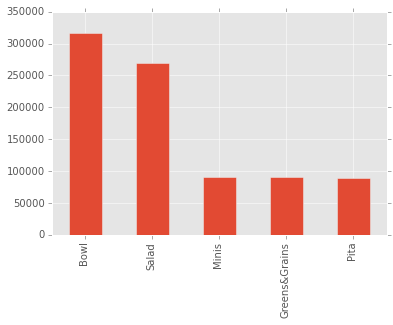

In [17]:
df_bp.Base.value_counts().plot(kind='bar')

We can also quickly find out that Chicken is the most popular protein, followed distantly by the Falafel, meatballs,
lamb sliders (a Cava Grill menu item?), and the two braised meats.

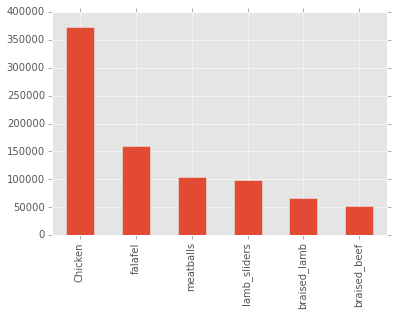

In [18]:
df_bp.Protein.value_counts().plot(kind='bar')

Now let's see if customers are more likely to order a certain Protein after ordering a particular Base.

In [19]:
bp_table = pd.crosstab(index=df_bp["Base"], 
                       columns=df_bp["Protein"])

We can see in the following plot that a customer ordering a Bowl, Greens&Grains, and Salad Base is highly likely to order
Chicken as their protein. Salad customers also enjoy the Falafel as their protein as a close second choice. Minis are less 
ordered as a Base, but customers who choose the Minis Base slightly prefer Meatballs as their protein. Pita lovers mostly prefer
Chicken, meatballs, and lamb sliders as their protein choice. An interesting question would be whether or not the shape of the Pita and the Minis lend itself better to Meatballs as a protein choice, leading to the seemingly stronger than usual preference
compared to other Bases.

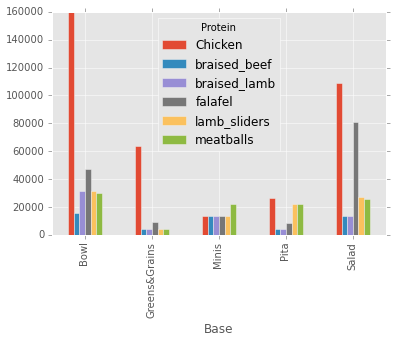

In [20]:
bp_table.plot(kind="bar")

Let's see if there's any linkage between ordering a particular Protein and a Side item.

In [21]:
df_ps = df_final[['Protein', 'Side1', 'Side2']]

We can see in the following plot that those who order Chicken are likely to order a Cookie as well. It's important to note that 
Chicken is far and away the most popular protein, and this uneven distribution skews the bar plot heavily. Cookies are favored
by braised beef and meatball lovers as well.

Chips may be a popular Side choice as well, as lamb sliders and braised lamb are less popular Protein choices but often lead
to customers picking up a bag of chips.

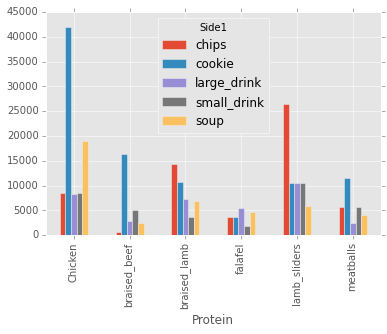

In [22]:
ps_table = pd.crosstab(index = df_ps["Protein"], columns=df_ps['Side1'])
ps_table.plot(kind="bar")

Now let's see if picking a particular Base leads to selecting a particular Side item.

In [23]:
df_bs = df_final[['Base', 'Side1', 'Side2']]

In [24]:
bs_table = pd.crosstab(index = df_bs["Base"], columns=df_bs['Side1'])

We can see that Cookies are the clear favorite for all Base types. Coming in second for almost all the Bases is Chips, with the
exception that Greens&Grain customers slightly prefer a Soup side more. Across the board, soups and the two drink sizes
are the least favored Side items for all the Base options.

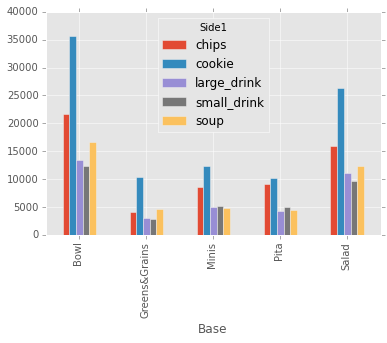

In [25]:
bs_table.plot(kind="bar")

The way this data is structured, we can see if customers are likely to order a certain type of second Side item.

In [26]:
bs2_table = pd.crosstab(index = df_bs["Base"], columns=df_bs['Side2'])

The distributions are largely unchanged from Side item 1, however we can see an increase in preference for Chips. This 
is seen most dramatically in Pita lovers.

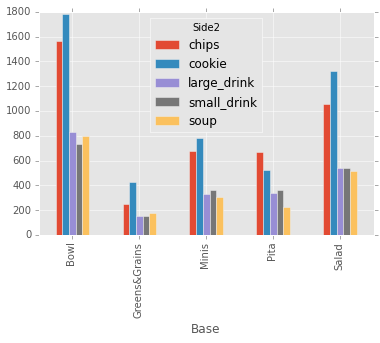

In [27]:
bs2_table.plot(kind="bar")

And finally we can observe if selecting a Side item first will lead to selecting another type of Side item. This is caveated
by the fact that we do not know what order the Side items are chosen at time of transaction, as the Side items could be ordered
by how the cashier rang up the Side items.

Again, we clearly see that Cookies and Chips are the favorite side items, with many customers ordering two Sides of Chips
and Cookies. Even when selecting a non-Cookie or non-Chip option, Cookies and Chips still highly coincide with the other
Side items.

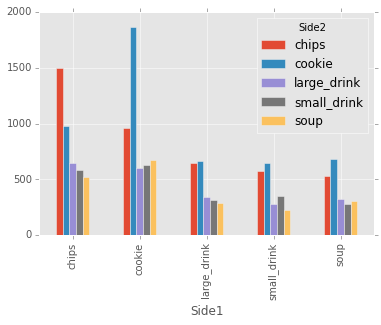

In [28]:
ss_table = pd.crosstab(index = df_bs["Side1"], columns=df_bs['Side2'])
ss_table.plot(kind="bar")

This high level analysis can take us a long way. For example, we can start to investigate customer's preferences
based on an initial selection. This leads to possibilities such as offering customers targeted coupons, 
suggesting preset meal combinations, and insight in to customer's nutritional goals.

With more data, it can also lead to learning how groups tend to order at Cava. If a transaction encompasses several meals,
is it more likely that a drink is ordered for everyone? Are people more likely to watch what they eat when ordering
around their friends or colleagues?

Some possible follow up tasks and question:
    1. How would the data looked once it is normalized? 
    2. Are Minis, Salad, and Greens&Grain customers more likely to grab 2 Side items?
       -Some reasons for this could be that these Base choices are less filling, or perceived to be less filling. Also a                     customer ordering this Base may grant themselves leeway in eating Side items as they believe they are intaking
       less calories due to their choice in Base.
    3. If customers are using the Cava app to pay for these meals, how  do their selected preferences in the Cava app align
       with their real-life food choices?
    4. Given more data, explore recommender system possibilities for item combinations.